<a href="https://colab.research.google.com/github/sridevibonthu/EVA4Phase2/blob/master/Session3/notebooks/E4P2_Facial_Landmark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.6.9


In [ ]:
import dlib
import cv2
import numpy as np
from renderFace import renderFace
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib


In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2020-08-11 10:49:21--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.6MB/s    in 3.5s    

2020-08-11 10:49:25 (17.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x), int(p.y)))
  f.close()

In [ ]:
# Landmark model location
MODEL_PATH = "/content/"
PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

In [ ]:
# Get the face detector instance
faceDetector = dlib.get_frontal_face_detector()

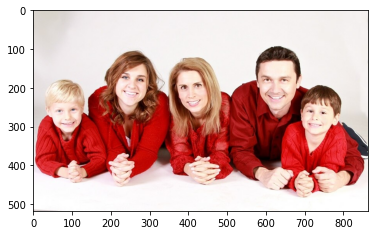

In [ ]:
#Initialize the landmark predictor
# the landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

#Read image
imageFilename = "/content/family.jpg"
im = cv2.imread(imageFilename)

# landmarks will be stored in results/family_i.txt
landmarksBasename = "results/family"

plt.imshow(im[:, :, ::-1])
plt.show()

In [ ]:
# Detect Faces in the image
faceRects = faceDetector(im, 0)
print("Number of faces detected: ", len(faceRects))

# List to store landmarks of all detected faces 
landmarksAll = []

Number of faces detected:  5


In [ ]:
# Detect Landmarks for each face
# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()), int(faceRects[i].top()), int(faceRects[i].right()), int(faceRects[i].bottom()))

  #for every face rectangle, run landmarkDetector
  landmarks = landmarkDetector(im, newRect)

  #print number of landmarks
  if i==0:
    print("Number of landmarks : ", len(landmarks.parts()))
  
  #Store landmarks for current face
  landmarksAll.append(landmarks)

  #render the outline of the face using detected landmarks
  renderFace(im, landmarks)

  #the code below save the landmarks to results/family_0.txt.... results/family_4.txt
  landmarksFileName = landmarksBasename + "_" + str(i) + ".txt"
  print("Saving landmarks to ", landmarksFileName)
  
  #write landmarks to disk
  writeLandmarksToFile(landmarks, landmarksFileName)

Number of landmarks :  68
Saving landmarks to  results/family_0.txt
Saving landmarks to  results/family_1.txt
Saving landmarks to  results/family_2.txt
Saving landmarks to  results/family_3.txt
Saving landmarks to  results/family_4.txt


In [ ]:
outputFileName = "results/familyLandmarks.jpg"
print("Saving output image to ", outputFileName)

cv2.imwrite(outputFileName, im)

Saving output image to  results/familyLandmarks.jpg


True

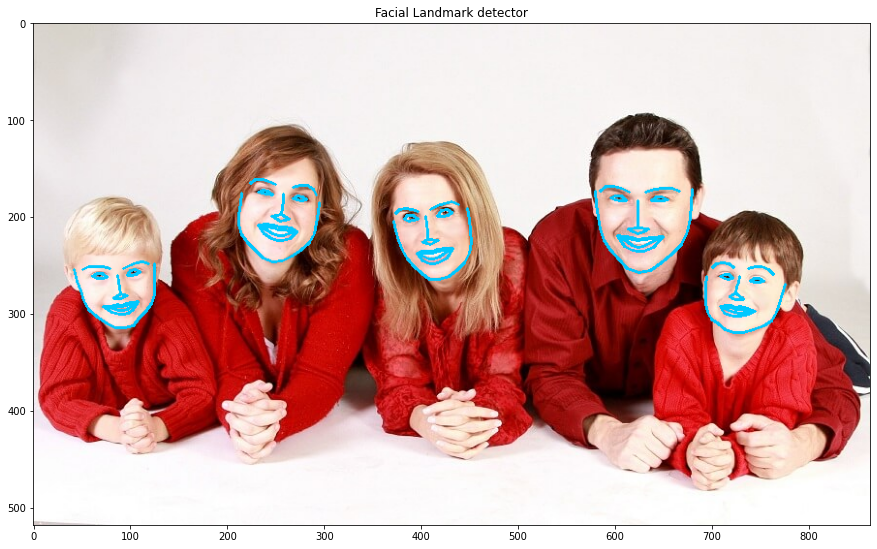

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(im[:, :, ::-1])
plt.title("Facial Landmark detector")
plt.show()